THIS IS A DEMONSTRATE FILE TO SHOW HOW YOLOv8 MODEL CAN EXTRACT THE PATTERNS

If you want to use yolo in terminal:

(terminal) detect & crop  >> 

`yolo task=detect mode=predict model=best.pt source=input/ save_crop=True`

(terminal) detect/predict >> 

`yolo predict model=first_detect_object.pt source={picture_path} save=True`

In [ ]:
# prompt: install YOLOv8 related libraries for image recognizing

!pip install ultralytics


In [36]:
# LOAD ALL NECESSARY LIBRARIES AND MODELS

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/PracticalML/Project_Color_Calibration"
base_path = "/content/drive/My Drive/Colab Notebooks/PracticalML/Project_Color_Calibration"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
detect_pattern.ipynb  model_first.pt  model_second.pt


In [37]:
# Load the first YOLOv8 model
model1_path = os.path.join(base_path, "model_first.pt")
model1 = YOLO(model1_path)

# Load the second YOLOv8 model
model2_path = os.path.join(base_path, "model_second.pt")
model2 = YOLO(model2_path)


In [41]:
# Upload image
uploaded = files.upload()


Saving 2002-4B_4.jpg to 2002-4B_4.jpg


In [45]:
# Make sure the image can be used to recgonize
from PIL import Image

# Get the name
uploaded_filename = list(uploaded.keys())[0]
image_path = f"/content/{uploaded_filename}"

# Load the image
image = cv2.imread(image_path)

# If OpenCV can't read it, try processing it with PIL
if image is None:
    print(f"Load {uploaded_filename} Failed, try converting format...")
    try:
        pil_image = Image.open(image_path).convert("RGB")
        image = np.array(pil_image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # 转换为 OpenCV 格式
        print(f"Success Converting {uploaded_filename}")
    except Exception as e:
        print(f"Failed to convert {uploaded_filename}: {e}")
        image = None

if image is not None:
    print(f"Image {uploaded_filename} load, size: {image.shape}")


Image 2002-4B_4.jpg load, size: (3024, 4032, 3)



0: 480x640 1 color_card, 116.6ms
Speed: 5.8ms preprocess, 116.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


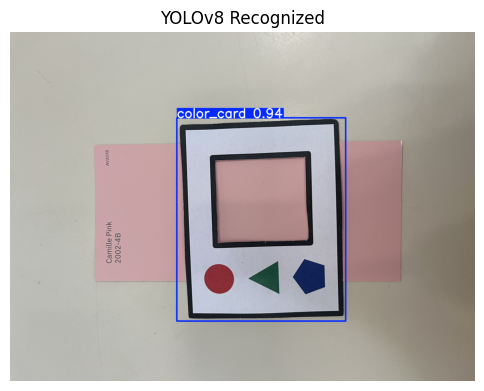

Image cropped. Size: (1761, 1464, 3)


In [46]:
import matplotlib.pyplot as plt

# Use model1 to narrow the recognizing area
results1 = model1(image)

# Display YOLOv8 recognition results (full image + recognition box)
annotated_image = results1[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLOv8 Recognized")
plt.show()

# Get the detection frame
boxes = results1[0].boxes if results1 else []

if len(boxes) > 0:
    box = boxes[0]  # Take the first target box
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integer

    # Make sure the cropping range is within the image boundaries
    h, w, _ = image.shape
    x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)

    # Cut the card
    image_crop = image[y1:y2, x1:x2]

    print(f"Image cropped. Size: {image_crop.shape}")
else:
    print("Card Not Recognized")
    image_crop = None



0: 640x544 1 black_box, 1 red_circle, 1 green_triangle, 1 blue_pentagon, 125.0ms
Speed: 4.2ms preprocess, 125.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 544)


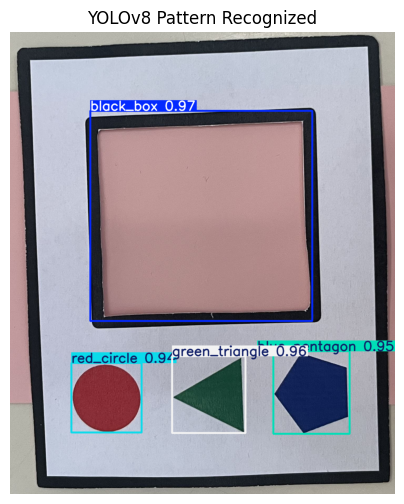

In [47]:
# Recognize patterns based on cropped image
if image_crop is not None:
    # use model2 to recognize pattern
    results2 = model2(image_crop)

    # show target box of each pattern
    annotated_crop = results2[0].plot()
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated_crop, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("YOLOv8 Pattern Recognized")
    plt.show()
else:
    print("Failed")



0: 640x544 1 black_box, 1 red_circle, 1 green_triangle, 1 blue_pentagon, 228.2ms
Speed: 13.6ms preprocess, 228.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


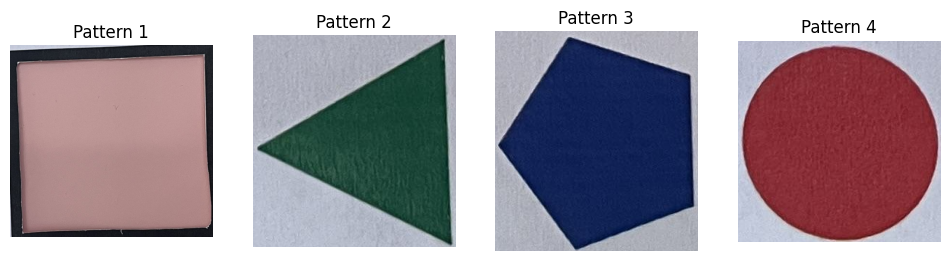

In [49]:
# For further analysis
# Ensure that image_crop exists
if image_crop is not None:
    results2 = model2(image_crop)  # Recognize patterns using model2
    boxes = results2[0].boxes if results2 else []

    # Store all detected patterns
    patterns = []

    # Iterate through all detected bounding boxes
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        h, w, _ = image_crop.shape

        # Ensure coordinates do not exceed image boundaries
        x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)

        # Crop the pattern and store it in the array
        pattern_crop = image_crop[y1:y2, x1:x2]
        patterns.append(pattern_crop)

    # Display all detected patterns
    fig, axes = plt.subplots(1, len(patterns), figsize=(12, 4))

    for i, pattern in enumerate(patterns):
        axes[i].imshow(cv2.cvtColor(pattern, cv2.COLOR_BGR2RGB))
        axes[i].axis("off")
        axes[i].set_title(f"Pattern {i+1}")

    plt.show()

else:
    print("Detection failed, no patterns found.")
